In [ ]:
!pip install selenium
!apt-get update
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin

Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:2 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran35/ InRelease
Hit:3 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:4 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Hit:5 http://security.ubuntu.com/ubuntu bionic-security InRelease
Ign:6 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:7 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:8 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Hit:9 http://archive.ubuntu.com/ubuntu bionic-updates InRelease
Hit:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease
Hit:11 http://ppa.launchpad.net/marutter/c2d4u3.5/ubuntu bionic InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
chromiu

In [ ]:
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')
from selenium import webdriver
from tqdm import tqdm_notebook as tqdm
import pandas
import json
import pprint

In [ ]:
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')

In [ ]:
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.decathlon.it/C-460429-scarpe-running/N-379675-genere~uomo/N-379675-genere~donna#page2")

#pagina scarpe running uomo e donna

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: use options instead of chrome_options
  """Entry point for launching an IPython kernel.


Populating the interactive namespace from numpy and matplotlib


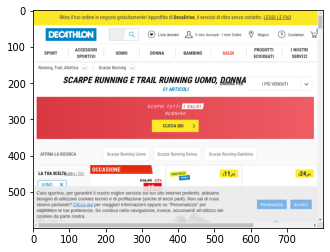

In [ ]:
wd.save_screenshot('screenshot.png')

%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/screenshot.png')
imgplot = plt.imshow(img)
plt.show()


ISPEZIONE DEL SITO
1.   p.product-brand -> brand 
2.   h3.product-label -> titolo (uomo donna, scarpe e colore non sempre)
3.   div.price -> prezzo
4.   li.new-product-thumbnail.desktop -> box prodotti 
5.   a.thumbnail-link[href] -> url, link pagina di dettaglio






In [ ]:
lista_prodotti = wd.find_elements_by_css_selector("li.new-product-thumbnail.desktop")
print(len(lista_prodotti))

51


In [ ]:
import pprint
dettagli_prodotti = []
prezzo_originale = ""

for prodotto in lista_prodotti:
    titolo = prodotto.find_elements_by_css_selector("h3.product-label")[0].text
    brand = prodotto.find_elements_by_css_selector("p.product-brand")[0].text

    try:
      prezzo_originale = prodotto.find_elements_by_css_selector("span.old-price.crossed.price--crossed")[0].text
    except:
      pass

    prezzo = prodotto.find_elements_by_css_selector("div.price")[0].text
    url = prodotto.find_elements_by_css_selector("a.thumbnail-link")[0].get_attribute("href")
  
    dettagli_prodotti.append({'titolo': titolo,
                            'brand': brand,
                            'prezzo_originale' : prezzo_originale,
                            'prezzo': prezzo,
                            'url':url
                            })

pprint.pprint(dettagli_prodotti)


[{'brand': 'KALENJI',
  'prezzo': '€12,99',
  'prezzo_originale': '€\n16\n,\n99',
  'titolo': 'SCARPE RUNNING DONNA RUN CUSHION GRIGIE',
  'url': 'https://www.decathlon.it/scarpe-donna-run-cushion-id_8558231.html'},
 {'brand': 'KALENJI',
  'prezzo': '€11,99',
  'prezzo_originale': '',
  'titolo': 'SCARPE RUNNING UOMO RUN ONE GRIGIE',
  'url': 'https://www.decathlon.it/scarpe-uomo-run-100-grigie-id_8351755.html'},
 {'brand': 'KALENJI',
  'prezzo': '€24,99',
  'prezzo_originale': '',
  'titolo': 'SCARPE RUNNING UOMO RUN ACTIVE BLU',
  'url': 'https://www.decathlon.it/scarpe-uomo-run-active-blu-id_8559090.html'},
 {'brand': 'MIZUNO',
  'prezzo': '€69,99',
  'prezzo_originale': '€\n109\n,\n99',
  'titolo': 'SCARPA RUNNING UOMO WAVE PRODIGY',
  'url': 'https://www.decathlon.it/scarpa-wave-prodigy-uomo-id_8590820.html'},
 {'brand': 'SALOMON',
  'prezzo': '€79,99',
  'prezzo_originale': '€\n109\n,\n99',
  'titolo': 'SCARPE TRAIL UOMO SUPERCROSS NERE',
  'url': 'https://www.decathlon.it/scarpe

In [ ]:
print(len(dettagli_prodotti))

51


In [ ]:
import pandas as pd
ds_dettagli_prodotti = pd.DataFrame(dettagli_prodotti)
ds_dettagli_prodotti.head()

,titolo,brand,prezzo_originale,prezzo,url
0,SCARPE RUNNING DONNA RUN CUSHION GRIGIE,KALENJI,"€\n16\n,\n99","€12,99",https://www.decathlon.it/scarpe-donna-run-cush...
1,SCARPE RUNNING UOMO RUN ONE GRIGIE,KALENJI,,"€11,99",https://www.decathlon.it/scarpe-uomo-run-100-g...
2,SCARPE RUNNING UOMO RUN ACTIVE BLU,KALENJI,,"€24,99",https://www.decathlon.it/scarpe-uomo-run-activ...
3,SCARPA RUNNING UOMO WAVE PRODIGY,MIZUNO,"€\n109\n,\n99","€69,99",https://www.decathlon.it/scarpa-wave-prodigy-u...
4,SCARPE TRAIL UOMO SUPERCROSS NERE,SALOMON,"€\n109\n,\n99","€79,99",https://www.decathlon.it/scarpe-trail-uomo-sup...


In [ ]:
ds_dettagli_prodotti.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   titolo            51 non-null     object
 1   brand             51 non-null     object
 2   prezzo_originale  51 non-null     object
 3   prezzo            51 non-null     object
 4   url               51 non-null     object
dtypes: object(5)
memory usage: 2.1+ KB


In [ ]:
ds_dettagli_prodotti.to_csv('ds_scarpe_running_indice.csv')

In [ ]:
# open csv file
import pandas as pd
ds_dettagli_prodotti= pd.read_csv("ds_scarpe_running_indice.csv", index_col = "url")
ds_dettagli_prodotti.head()
ds_dettagli_prodotti.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, https://www.decathlon.it/scarpe-donna-run-cushion-id_8558231.html to https://www.decathlon.it/scarpe-atletica-at-cross-nere-id_8504502.html
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        51 non-null     int64 
 1   titolo            51 non-null     object
 2   brand             51 non-null     object
 3   prezzo_originale  10 non-null     object
 4   prezzo            51 non-null     object
dtypes: int64(1), object(4)
memory usage: 2.4+ KB


Vado ora a fare lo scraping delle pagine di dettaglio

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []
for url, prodotto in ds_dettagli_prodotti.head().iterrows():

    time.sleep(4)
    link = url 

    colore = "null"
    colore_variante_1 = "null"
    colore_variante_2 = "null"
    colore_variante_3 = "null"

    print(link) 
    
    wd.set_window_size(1920, 1080)
    wd.get(link)

    titolo = wd.find_elements_by_css_selector("span#productName")[0].text
    codice_prodotto = wd.find_elements_by_css_selector("div.ref-product")[0].text
    
    descrizione_1 = wd.find_elements_by_css_selector("span.concuPourBloc.concuPourBlocExpressBuy")[0].text
    descrizione_2 = wd.find_elements_by_css_selector("span.catchline")[0].text
    vantaggi = wd.find_elements_by_css_selector("div.block-complementary-zone")[0].text
    informazioni_tecniche = wd.find_elements_by_css_selector("div.block-complementary-zone")[1].text
    composizione = wd.find_elements_by_css_selector("div.block-complementary-zone")[2].text
    impegno = wd.find_elements_by_css_selector("div.block-complementary-zone")[3].text
    
    try:
      colore = wd.find_elements_by_css_selector("div.swiper-container div.swiper-slide a")[0].get_attribute("data-title")
    except:
      pass

    try:
      colore_variante_1 = wd.find_elements_by_css_selector("div.swiper-container div.swiper-slide a")[1].get_attribute("data-title")
    except:
      pass

    try:
      colore_variante_2 = wd.find_elements_by_css_selector("div.swiper-container div.swiper-slide a")[2].get_attribute("data-title")
    except:
        pass

    try:
      colore_variante_3 = wd.find_elements_by_css_selector("div.swiper-container div.swiper-slide a")[3].get_attribute("data-title")
    except:
        pass 

   

    details.append({'titolo' : titolo,

                    'url' : link,
                    
                    'codice_prodotto': codice_prodotto,

                    'descrizione_1' : descrizione_1,
                    'descrizione_2' : descrizione_2,

                    'vantaggi' : vantaggi, 
                    'informazini_tecniche' : informazioni_tecniche,

                    'composizione' : composizione,
                    'impegno' : impegno,
                    'colore' : colore,
                    'colore_variante_1' : colore_variante_1,
                    'colore_variante_2' : colore_variante_2,
                    'colore_variante_3' : colore_variante_3
                    })

len(details)
print(len(details))
pprint.pprint(details)




https://www.decathlon.it/scarpe-donna-run-cushion-id_8558231.html
https://www.decathlon.it/scarpe-uomo-run-100-grigie-id_8351755.html
https://www.decathlon.it/scarpe-uomo-run-active-blu-id_8559090.html
https://www.decathlon.it/scarpa-wave-prodigy-uomo-id_8590820.html
https://www.decathlon.it/scarpe-trail-uomo-supercross-id_8587011.html
5
[{'codice_prodotto': 'Codice : 8558231',
  'colore': 'Viola-grigio',
  'colore_variante_1': 'NERO',
  'colore_variante_2': 'null',
  'colore_variante_3': 'null',
  'composizione': 'Composizione/consigli\n'
                  'Composizione\n'
                  'Suola esterna in\n'
                  '40.00% Gomma - Sintetica, 60.00% Etilene Vinil Acetato '
                  '(EVA)\n'
                  'Esterno in\n'
                  '30.00% Poliuretano (PU), 70.00% Poliestere cationico (PES '
                  'cat)\n'
                  'Interno in\n'
                  '50.00% Poliestere cationico (PES cat), 50.00% Etilene Vinil '
                  'Acet

ho visto che ci sono massimo 4 colori per modello (colore principale + 3 varianti). solo in questi modelli avremo estrapolate le info sul colore. per quelli che non presentano varianti di colori, l'informazione relativa al colore la dovremo desumere dal titolo in fase di pulizia dei dati. Mentre altri (pochi) modelli non presentano questa info. CLARIFAI??

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import time
details = []

for url, prodotto in tqdm(ds_dettagli_prodotti.iterrows(), total=ds_dettagli_prodotti.shape[0]):
    time.sleep(4)
    link = url 

    colore = "null"
    colore_variante_1 = "null"
    colore_variante_2 = "null"
    colore_variante_3 = "null"
    
    print(link) 
    wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
    wd.set_window_size(1920, 1080)
    wd.get(link)  

    titolo = wd.find_elements_by_css_selector("span#productName")[0].text
    codice_prodotto = wd.find_elements_by_css_selector("div.ref-product")[0].text
    
    descrizione_1 = wd.find_elements_by_css_selector("span.concuPourBloc.concuPourBlocExpressBuy")[0].text
    descrizione_2 = wd.find_elements_by_css_selector("span.catchline")[0].text
    vantaggi = wd.find_elements_by_css_selector("div.block-complementary-zone")[0].text
    informazioni_tecniche = wd.find_elements_by_css_selector("div.block-complementary-zone")[1].text
    composizione = wd.find_elements_by_css_selector("div.block-complementary-zone")[2].text
    impegno = wd.find_elements_by_css_selector("div.block-complementary-zone")[3].text
    
    try:
      colore = wd.find_elements_by_css_selector("div.swiper-container div.swiper-slide a")[0].get_attribute("data-title")
    except:
      print("errore 1")
      pass

    try:
      colore_variante_1 = wd.find_elements_by_css_selector("div.swiper-container div.swiper-slide a")[1].get_attribute("data-title")
    except:
      print("errore 2")
      pass

    try:
      colore_variante_2 = wd.find_elements_by_css_selector("div.swiper-container div.swiper-slide a")[2].get_attribute("data-title")
    except:
      print("errore 3")
      pass

    try:
      colore_variante_3 = wd.find_elements_by_css_selector("div.swiper-container div.swiper-slide a")[3].get_attribute("data-title")
    except:
      print("errore 4")
      pass 

   

    details.append({'titolo' : titolo,

                    'url' : link,
                    
                    'codice_prodotto': codice_prodotto,

                    'descrizione_1' : descrizione_1,
                    'descrizione_2' : descrizione_2,

                    'vantaggi' : vantaggi, 
                    'informazini_tecniche' : informazioni_tecniche,

                    'composizione' : composizione,
                    'impegno' : impegno,
                    'colore' : colore,
                    'colore_variante_1' : colore_variante_1,
                    'colore_variante_2' : colore_variante_2,
                    'colore_variante_3' : colore_variante_3
                    })

len(details)
print(len(details))
pprint.pprint(details)



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


https://www.decathlon.it/scarpe-donna-run-cushion-id_8558231.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-run-100-grigie-id_8351755.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-run-active-blu-id_8559090.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpa-wave-prodigy-uomo-id_8590820.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-trail-uomo-supercross-id_8587011.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-gel-ziruss-azzurre-id_8585437.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-donna-run-support-rosa-id_8558968.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


https://www.decathlon.it/scarpe-uomo-run-cushion-id_8559099.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-run-support-blu-id_8559117.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


https://www.decathlon.it/scarpe-donna-quest-nere-id_8555982.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-run-active-grip-id_8559113.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-kiprun-long-2-nere-id_8556844.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 4
https://www.decathlon.it/scarpe-uomo-run-cushion-grip-id_8488057.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-donna-run-100-grigie-id_8351800.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-kiprun-ultralight-id_8556881.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-kiprun-fast-2-id_8556887.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-kiprun-ks-light-id_8556920.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


https://www.decathlon.it/scarpe-trail-donna-tr-celesti-id_8552168.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 4
https://www.decathlon.it/scarpe-donna-gel-glyde-nere-id_865261.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-trail-uomo-mt2-nere-id_8552178.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-donna-run-comfort-id_8572327.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


https://www.decathlon.it/scarpe-run-support-control-id_8569186.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-trail-uomo-xt7-nere-id_8561414.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-run-comfort-id_8569161.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 4
https://www.decathlon.it/scarpe-donna-run-active-rosa-id_8558959.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-donna-kiprun-long-2-id_8555168.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-trail-uomo-tr-blu-id_8561405.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-donna-kiprun-kd-plus-id_8555141.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 4
https://www.decathlon.it/scarpe-donna-kiprun-ks-light-id_8555159.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-donna-kiprun-fast-id_8555194.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-trail-gel-fujitrabuco-8-id_8586348.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-trail-donna-race-4-id_8552124.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-run-support-wr-id_8569529.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


https://www.decathlon.it/scarpe-uomo-kiprun-kd-plus-id_8505777.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-uomo-kiprun-kd-light-id_8556925.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-trail-uomo-race-ultra-id_8552116.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpa-wave-prodigy-2-donna-id_8590822.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-trail-uomo-race-4-nere-id_8552109.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-trail-donna-xt7-blu-id_8552163.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-donna-comfort-knit-nere-id_8554351.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-donna-run-cushion-grip-id_8488132.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpa-mizuno-wave-equate-4-id_8590813.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-donna-gel-glyde-blu-id_865262.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-atletica-at-jump-id_8518380.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-atletica-at-start-id_8575984.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-atletica-at-mid-azzurre-id_8558251.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-atletica-at-sprint-id_8506071.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-donna-kiprun-ultralight-id_8555171.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-donna-kiprun-kd-light-id_8555154.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 3
errore 4
https://www.decathlon.it/scarpe-trail-donna-mt2-celesti-id_8402715.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4
https://www.decathlon.it/scarpe-atletica-at-cross-nere-id_8504502.html


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: use options instead of chrome_options


errore 1
errore 2
errore 3
errore 4

51
[{'codice_prodotto': 'Codice : 8558231',
  'colore': 'Viola-grigio',
  'colore_variante_1': 'NERO',
  'colore_variante_2': 'null',
  'colore_variante_3': 'null',
  'composizione': 'Composizione/consigli\n'
                  'Composizione\n'
                  'Suola esterna in\n'
                  '40.00% Gomma - Sintetica, 60.00% Etilene Vinil Acetato '
                  '(EVA)\n'
                  'Esterno in\n'
                  '30.00% Poliuretano (PU), 70.00% Poliestere cationico (PES '
                  'cat)\n'
                  'Interno in\n'
                  '50.00% Poliestere cationico (PES cat), 50.00% Etilene Vinil '
                  'Acetato (EVA)',
  'descrizione_1': 'Le nostre equipe di ideazione hanno sviluppato queste '
                   'scarpe per le tue prime uscite di running, 1 volta alla '
                   'settimana, in strada o su tapis roulant.',
  'descrizione_2': 'Leggerezza e ammortizzamento per iniziare a pratica

In [ ]:
len(details)

51

In [ ]:
import pandas as pd
ds_details = pd.DataFrame(details)
ds_details.set_index("codice_prodotto")
ds_details.head()

,titolo,url,codice_prodotto,descrizione_1,descrizione_2,vantaggi,informazini_tecniche,composizione,impegno,colore,colore_variante_1,colore_variante_2,colore_variante_3
0,SCARPE RUNNING DONNA RUN CUSHION GRIGIE,https://www.decathlon.it/scarpe-donna-run-cush...,Codice : 8558231,Le nostre equipe di ideazione hanno sviluppato...,Leggerezza e ammortizzamento per iniziare a pr...,I vantaggi\nAmmortizzamento\nSuola in schiuma ...,Informazioni tecniche\nPERCHÉ LE SCARPE RUN CU...,Composizione/consigli\nComposizione\nSuola est...,Il nostro impegno\nTest prodotto\nQueste scarp...,Viola-grigio,NERO,null,null
1,SCARPE RUNNING UOMO RUN ONE GRIGIE,https://www.decathlon.it/scarpe-uomo-run-100-g...,Codice : 8351755,Abbiamo ideato queste scarpe da running per gl...,Per scoprire il running ad un prezzo ridotto!,I vantaggi\nLeggerezza\nScarpe molto leggere: ...,Informazioni tecniche\nPESO\n180g il 43.\nMISU...,Composizione/consigli\nComposizione\nSuola est...,Il nostro impegno\nTest prodotto\nQueste scarp...,null,null,null,null
2,SCARPE RUNNING UOMO RUN ACTIVE BLU,https://www.decathlon.it/scarpe-uomo-run-activ...,Codice : 8559090,Abbiamo ideato queste scarpe da running per ga...,Comfort e ammortizzamento sul tallone sono i p...,I vantaggi\nAmmortizzamento\nConcetto CS sul t...,Informazioni tecniche\nMISURE\ndal 39 al 47.\n...,Composizione/consigli\nComposizione\nSuola est...,Il nostro impegno\nTest prodotto\nQueste scarp...,Grigio intenso,NERO,null,null
3,SCARPA RUNNING UOMO WAVE PRODIGY,https://www.decathlon.it/scarpa-wave-prodigy-u...,Codice : 8590820,Per i runners regolari che cercano una scarpa ...,Area tallonare ben ammortizzata grazie alla nu...,I vantaggi\nAmmortizzamento\nArea tallonare be...,Informazioni tecniche\nDROP\n12mm\nPESO\nSi è ...,Composizione/consigli\nConsigli per la manuten...,Il nostro impegno\nGaranzia\n2 anni,null,null,null,null
4,SCARPE TRAIL UOMO SUPERCROSS NERE,https://www.decathlon.it/scarpe-trail-uomo-sup...,Codice : 8587011,Prodotto ideato per fare running in mezzo alla...,"Scarpe da running per tutti i terreni, confort...",I vantaggi\nPresa\nSuola CONTAGRIP e tacchetti...,Informazioni tecniche\nMISURE\nDal 40 al 47.\n...,Composizione/consigli\nConsigli per la manuten...,Il nostro impegno\nGaranzia\n2 anni,null,null,null,null


In [ ]:
ds_details.to_csv("ds_scarpe_running_dettaglio.csv")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


IMMAGINI

In [ ]:
import time
import requests

lista_prodotti = []
lista_immagini = []

wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get(f"https://www.decathlon.it/C-460429-scarpe-running/N-379675-genere~uomo/N-379675-genere~donna#page2")
time.sleep(3)
lista_prodotti = wd.find_elements_by_css_selector("li.new-product-thumbnail.desktop")

print(len(lista_prodotti))
for prodotto in lista_prodotti:
  try:
     product_id = prodotto.get_attribute("data-product-id")
     src = prodotto.get_attribute('data-product-imgurl')
     print(src)
     wd.save_screenshot('screenshot.png')
     time.sleep(3)

     lista_immagini.append({"product_id" : product_id,
         "img_file": "img_" + str(product_id) + ".jpg"})
     img_file = requests.get(src, stream=True)

     if img_file.status_code == 200:
      with open("/content/images/img_" + str(product_id) + ".jpg", 'wb') as f:
       f.write(img_file.content)
  except Exception as e:
     print(e)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


51
https://contents.mediadecathlon.com/p1794820/k0bc79b9777490c172d0cf2c9724685d9/1794820_default.jpg?format=auto&quality=60&f=200x0
https://contents.mediadecathlon.com/p207647/k2586dfd49665dd378518222c7093088e/207647_default.jpg?format=auto&quality=60&f=200x0
https://contents.mediadecathlon.com/p1794808/k4c33c14dc4698aeb0bf2be2697ad0ca8/1794808_default.jpg?format=auto&quality=60&f=200x0
https://contents.mediadecathlon.com/p1832865/k865221f5962b3bfc4b4bb369d0c2251d/1832865_default.jpg?format=auto&quality=60&f=200x0
https://contents.mediadecathlon.com/p1734593/k9eb8c283b6a83ec5bc75b6e375ca5312/1734593_default.jpg?format=auto&quality=60&f=200x0
https://contents.mediadecathlon.com/p1767154/k47baebaf447da8bab05b0ac397a82055/1767154_default.jpg?format=auto&quality=60&f=200x0
https://contents.mediadecathlon.com/p1794815/k17b54fc45be1020570900eda47abc732/1794815_default.jpg?format=auto&quality=60&f=200x0
https://contents.mediadecathlon.com/p1794834/kd5cd6784822b8fda9a06c85932b60d9e/1794834_de

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.6/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


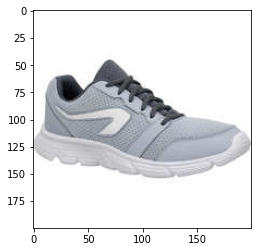

In [ ]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('/content/images/img_8351800.jpg')
imgplot = plt.imshow(img)
plt.show()

In [ ]:
import pandas as pd
ds_images = pd.DataFrame(lista_immagini)
ds_images.set_index("product_id")
ds_images.head()

,product_id,img_file
0,8558231,img_8558231.jpg
1,8351755,img_8351755.jpg
2,8559090,img_8559090.jpg
3,8590820,img_8590820.jpg
4,8587011,img_8587011.jpg


In [ ]:
ds_images.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  51 non-null     object
 1   img_file    51 non-null     object
dtypes: object(2)
memory usage: 944.0+ bytes


In [ ]:
ds_images.to_csv("ds_images.csv")

In [ ]:
!zip -r "/content/images.zip" "/content/images/"

  adding: content/images/ (stored 0%)
  adding: content/images/img_8572327.jpg (deflated 7%)
  adding: content/images/img_8504502.jpg (deflated 3%)
  adding: content/images/img_8590820.jpg (deflated 4%)
  adding: content/images/img_8569529.jpg (deflated 8%)
  adding: content/images/img_8559113.jpg (deflated 4%)
  adding: content/images/img_8555194.jpg (deflated 3%)
  adding: content/images/img_8552124.jpg (deflated 5%)
  adding: content/images/img_8555982.jpg (deflated 6%)
  adding: content/images/img_8587011.jpg (deflated 4%)
  adding: content/images/img_8556881.jpg (deflated 3%)
  adding: content/images/img_8552116.jpg (deflated 7%)
  adding: content/images/img_8561405.jpg (deflated 5%)
  adding: content/images/img_8555171.jpg (deflated 3%)
  adding: content/images/img_8351755.jpg (deflated 6%)
  adding: content/images/img_8488132.jpg (deflated 4%)
  adding: content/images/img_8554351.jpg (deflated 8%)
  adding: content/images/img_8561414.jpg (deflated 5%)
  adding: content/images/im